# Table of Contents
* [1. General functions](#1.-General-functions)
* [2. Analyze different workout](#2.-Analyze-different-workout)
	* [2.1 Rowing](#2.1-Rowing)
	* [2.2 Elliptical](#2.2-Elliptical)
	* [2.3 Walking](#2.3-Walking)
	* [2.4 TraditionalStrengthTraining](#2.4-TraditionalStrengthTraining)


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# 1. General functions

In [29]:
path = '/home/yulu/FreeTailHack/'
subpath = ['Juan_data', 'Tori_data', 'Carlos_data']
filenames = [
    'ActiveEnergyBurned',
    'BasalEnergyBurned',
    'DistanceWalkingRunning',
    'HeartRate',
    'StepCount']

In [30]:
analyzeType = [
    'ActiveEnergyBurned',
    'BasalEnergyBurned',
    'HeartRate',
    
]
workoutType = [
    'TraditionalStrengthTraining',
    'Elliptical',
    'Rowing',
    'Walking',
]

In [31]:
def loadWorkout(path, workoutType, activityType):
    #print(path, workoutType, activityType)
    file = path + activityType + '.csv'
    workoutFile = path + 'WorkOutCategory.csv'
    
    df = pd.read_csv(file, parse_dates=True)
    df.StartTime = pd.to_datetime(df.StartTime)
    df.EndTime = pd.to_datetime(df.EndTime)
    
    workout = pd.read_csv(workoutFile, index_col= 'ActivityType')
    #print(workout.head())
    workout.StartTime = pd.to_datetime(workout.StartTime)
    workout.EndTime = pd.to_datetime(workout.EndTime)

    startId = (df.StartTime - workout.loc[workoutType,'StartTime']).abs().idxmin()
    endId = (df.StartTime - workout.loc[workoutType,'EndTime']).abs().idxmin()
    #print(df.iloc[startId, :])
    activeSlice = df.iloc[startId:endId, :]
    return activeSlice

In [108]:
def loadWorkout(path, workoutType, activityType):
    #print(path, workoutType, activityType)
    file = path + activityType + '.csv'
    workoutFile = path + 'WorkOutCategory.csv'
    
    df = pd.read_csv(file, parse_dates=True)
    df.StartTime = pd.to_datetime(df.StartTime)
    df.EndTime = pd.to_datetime(df.EndTime)
    
    workout = pd.read_csv(workoutFile, index_col= 'ActivityType')
    #print(workout.head())
    workout.StartTime = pd.to_datetime(workout.StartTime)
    workout.EndTime = pd.to_datetime(workout.EndTime)

    startId = (df.StartTime - workout.loc[workoutType,'StartTime']).abs().idxmin()
    endId = (df.StartTime - workout.loc[workoutType,'EndTime']).abs().idxmin()
    #print(df.iloc[startId, :])
    activeSlice = df.iloc[startId:endId, :]

    return activeSlice

In [111]:
def loadWorkoutRolling(path, workoutType, activityType):
    #print(path, workoutType, activityType)
    file = path + activityType + '.csv'
    workoutFile = path + 'WorkOutCategory.csv'
    
    df = pd.read_csv(file, parse_dates=True)
    df.StartTime = pd.to_datetime(df.StartTime)
    df.EndTime = pd.to_datetime(df.EndTime)
    
    workout = pd.read_csv(workoutFile, index_col= 'ActivityType')
    #print(workout.head())
    workout.StartTime = pd.to_datetime(workout.StartTime)
    workout.EndTime = pd.to_datetime(workout.EndTime)

    startId = (df.StartTime - workout.loc[workoutType,'StartTime']).abs().idxmin()
    endId = (df.StartTime - workout.loc[workoutType,'EndTime']).abs().idxmin()
    #print(df.iloc[startId, :])
    activeSlice = df.iloc[startId:endId, :]
    activeSlice.loc[:, activityType].rolling(10).mean()
    return activeSlice

In [74]:
def loadWorkoutChanging(path, workoutType, activityType):
    #print(path, workoutType, activityType)
    file = path + activityType + '.csv'
    workoutFile = path + 'WorkOutCategory.csv'
    
    df = pd.read_csv(file, parse_dates=True)
    df.StartTime = pd.to_datetime(df.StartTime)
    df.EndTime = pd.to_datetime(df.EndTime)
    
    workout = pd.read_csv(workoutFile, index_col= 'ActivityType')
    #print(workout.head())
    workout.StartTime = pd.to_datetime(workout.StartTime)
    workout.EndTime = pd.to_datetime(workout.EndTime)

    startId = (df.StartTime - workout.loc[workoutType,'StartTime']).abs().idxmin()
    endId = (df.StartTime - workout.loc[workoutType,'EndTime']).abs().idxmin()
    #print(df.iloc[startId, :])
    activeSlice = df.iloc[startId:endId, :]
    #activeSlice['chaging'] = (activeSlice.loc[1:, activityType] - activeSlice.loc[:-1, activityType]) / (activeSlice[1:, 'StartTime'] - activeSlice[1:, 'StartTime']) 
    activeSlice.loc[:, 'changing']  = (activeSlice.loc[:,activityType].diff())  / (activeSlice.loc[:,'StartTime'].diff().dt.total_seconds())
    activeSlice.loc[:, 'tchange']  =(activeSlice.loc[:,'StartTime'].diff())

    return activeSlice

In [36]:
def loadWorkoutRatio(path, workoutType):
    #print(path, workoutType, activityType)
    eng_file = path + 'ActiveEnergyBurned.csv'
    hr_file = path + 'HeartRate.csv'
    workoutFile = path + 'WorkOutCategory.csv'
    
    df_eng = pd.read_csv(eng_file, parse_dates=True)
    df_eng.StartTime = pd.to_datetime(df_eng.StartTime)
    df_eng.EndTime = pd.to_datetime(df_eng.EndTime)
    
    df_hr = pd.read_csv(hr_file, parse_dates=True)
    df_hr.StartTime = pd.to_datetime(df_hr.StartTime)
    df_hr.EndTime = pd.to_datetime(df_hr.EndTime)
    
    workout = pd.read_csv(workoutFile, index_col= 'ActivityType')
    #print(workout.head())
    workout.StartTime = pd.to_datetime(workout.StartTime)
    workout.EndTime = pd.to_datetime(workout.EndTime)

    startId = (df.StartTime - workout.loc[workoutType,'StartTime']).abs().idxmin()
    endId = (df.StartTime - workout.loc[workoutType,'EndTime']).abs().idxmin()
    #print(df.iloc[startId, :])
    activeSlice_eng = df_eng.iloc[startId:endId, :]
    activeSlice_hr = df_hr.iloc[startId:endId, :]
    
    df_hr['ratio'] = activeSlice_eng.ActiveEnergyBurned/activeSlice_hr.HeartRate
    return df_hr

# 2. Analyze different workout

## Changing

In [88]:
WO.set_index('StartTime').rolling(10)

Rolling [window=10,center=False,axis=0]

Workout Type:  TraditionalStrengthTraining


/usr/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


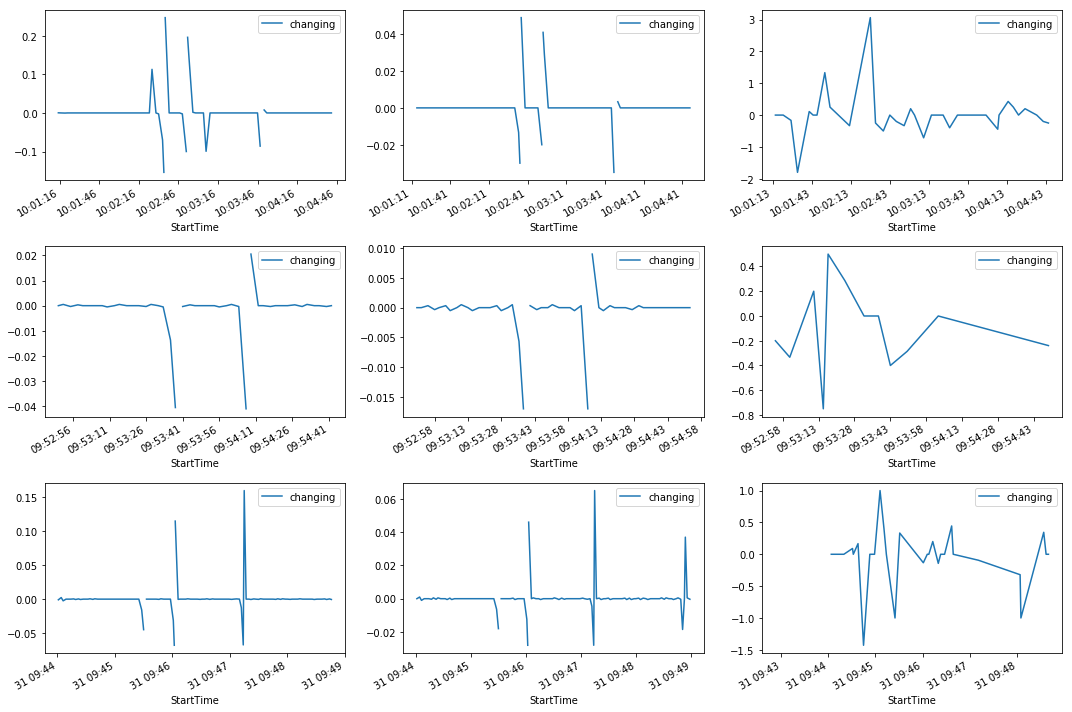

Workout Type:  Elliptical


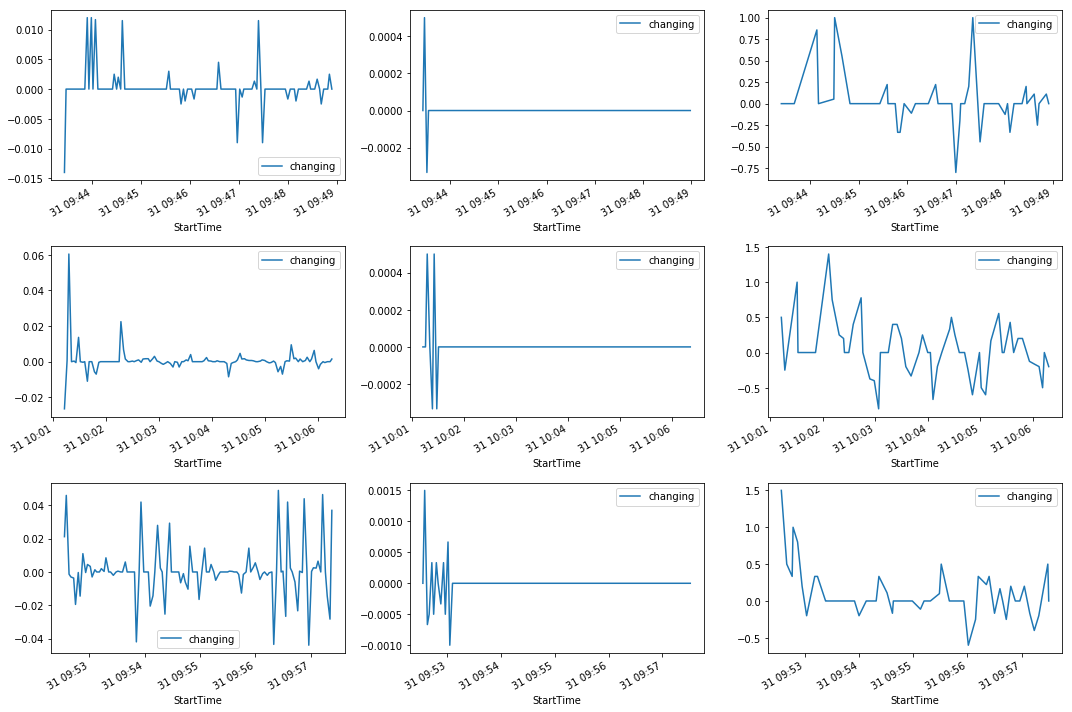

Workout Type:  Rowing


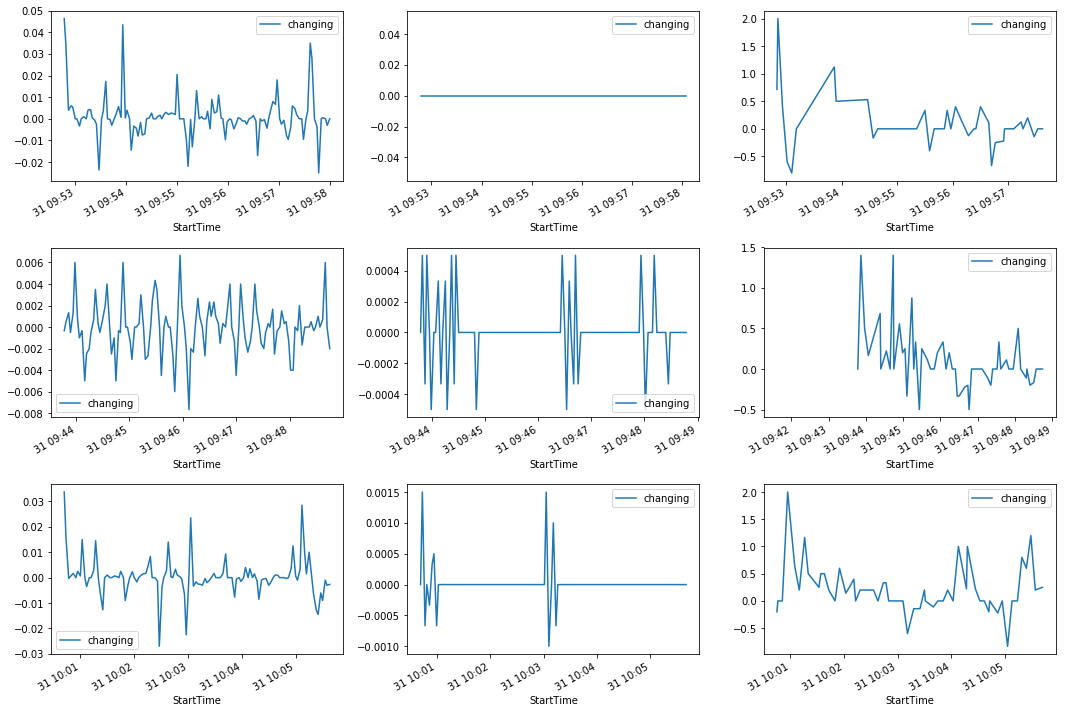

Workout Type:  Walking


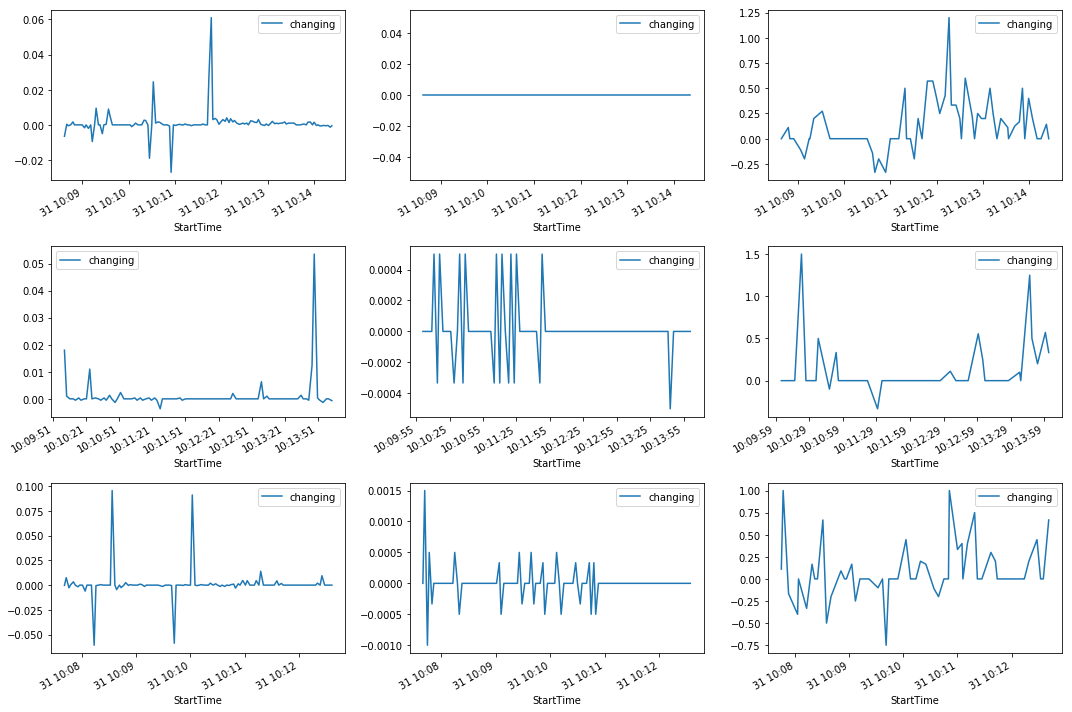

In [115]:
for wt in workoutType:
    print('Workout Type: ', wt)
    fig, axes = plt.subplots(3, 3, figsize = (15, 10))
    for i,p in enumerate(subpath):
        userPath = path + p + '/'
        for j in range(len(analyzeType)):
            WO = loadWorkoutChanging(userPath, wt, analyzeType[j])
            WO.plot(x = 'StartTime', y = 'changing', ax = axes[i,j])
    plt.tight_layout()
    plt.show()

## Rolling 

Workout Type:  TraditionalStrengthTraining


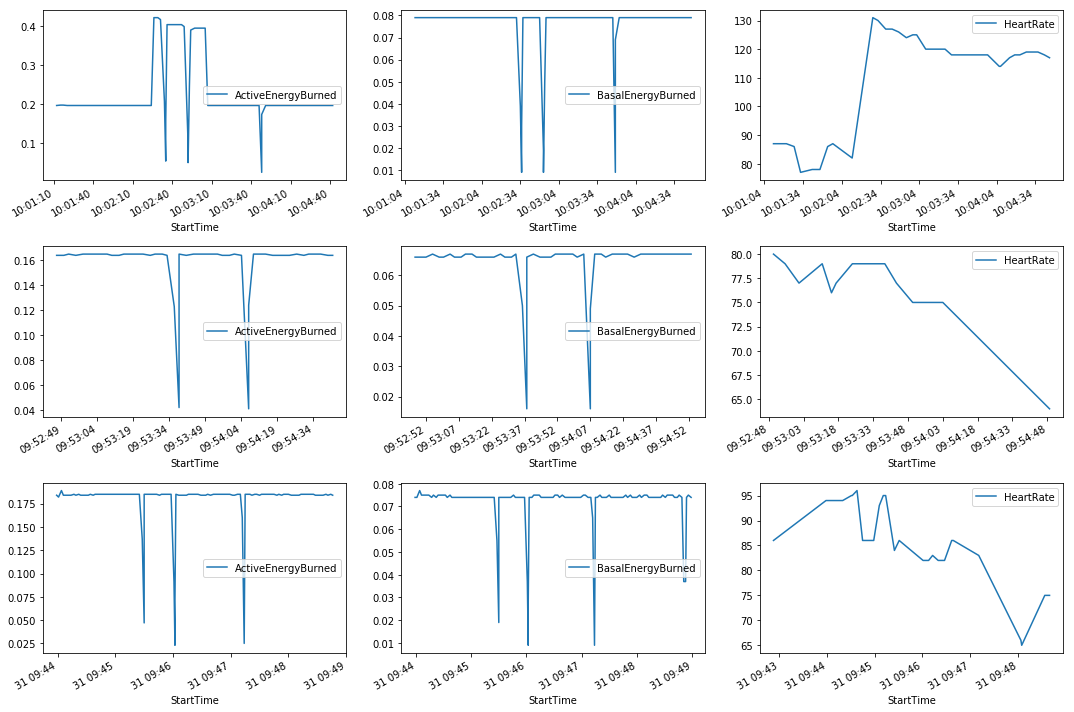

Workout Type:  Elliptical


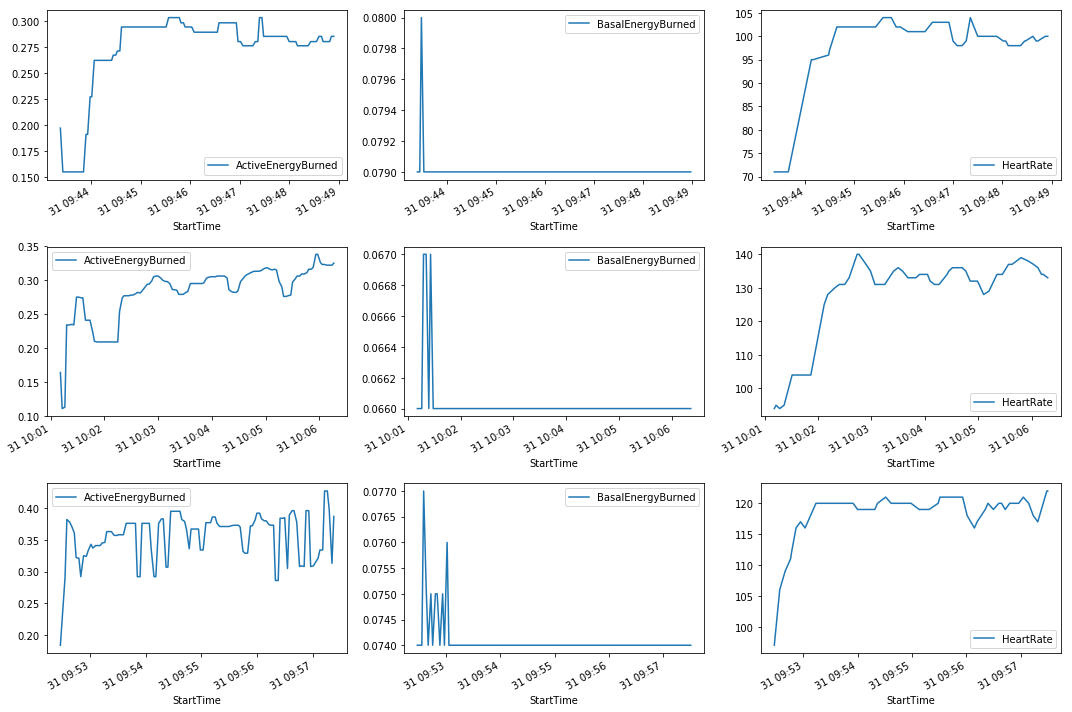

Workout Type:  Rowing


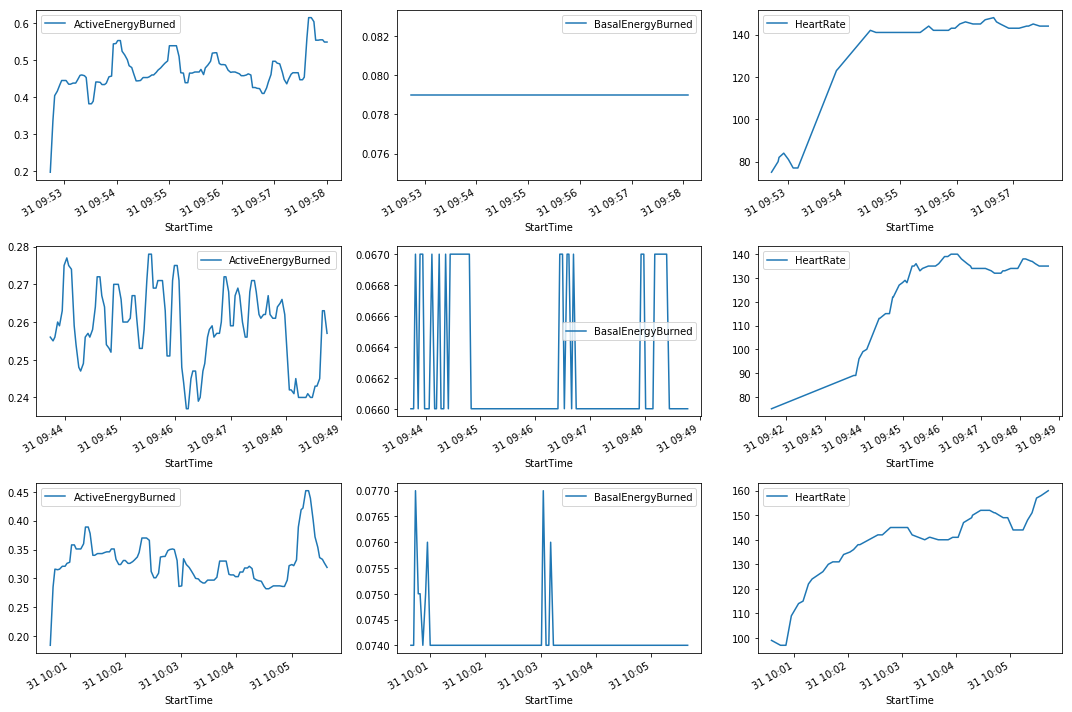

Workout Type:  Walking


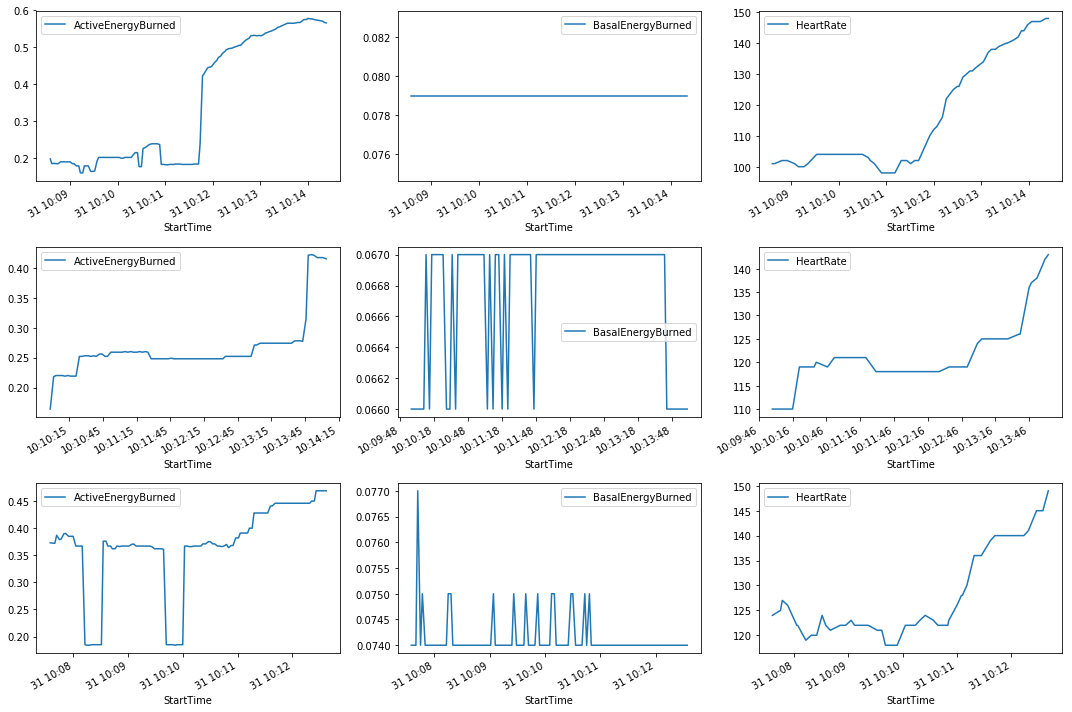

In [118]:
for wt in workoutType:
    print('Workout Type: ', wt)
    fig, axes = plt.subplots(3, 3, figsize = (15, 10))
    for i,p in enumerate(subpath):
        userPath = path + p + '/'
        for j in range(len(analyzeType)):
            WO = loadWorkoutRolling(userPath, wt, analyzeType[j])
            WO.plot(x = 'StartTime', y = analyzeType[j], ax = axes[i,j])
    plt.tight_layout()
    plt.show()

## 2.1 Workout Types 

Workout Type:  TraditionalStrengthTraining


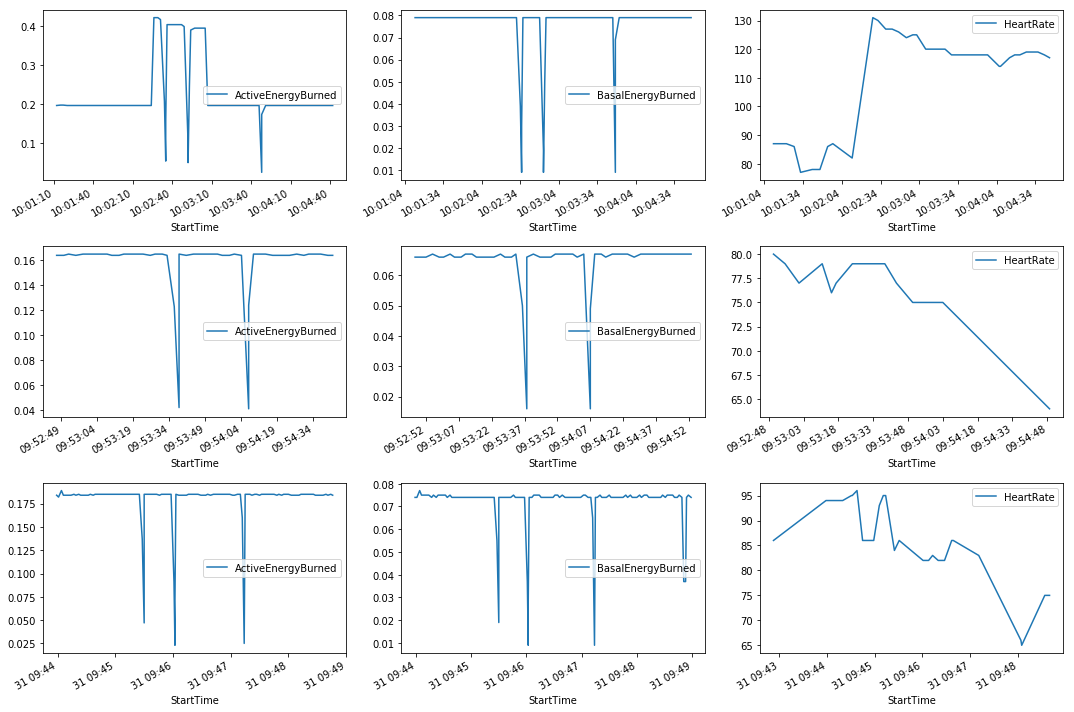

Workout Type:  Elliptical


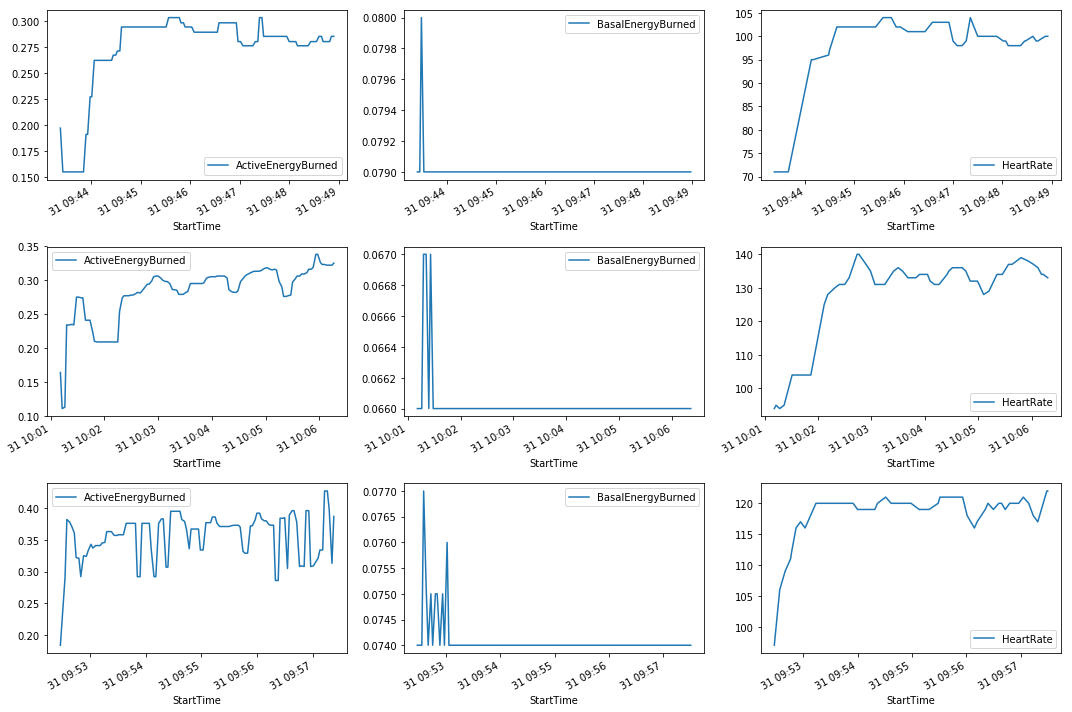

Workout Type:  Rowing


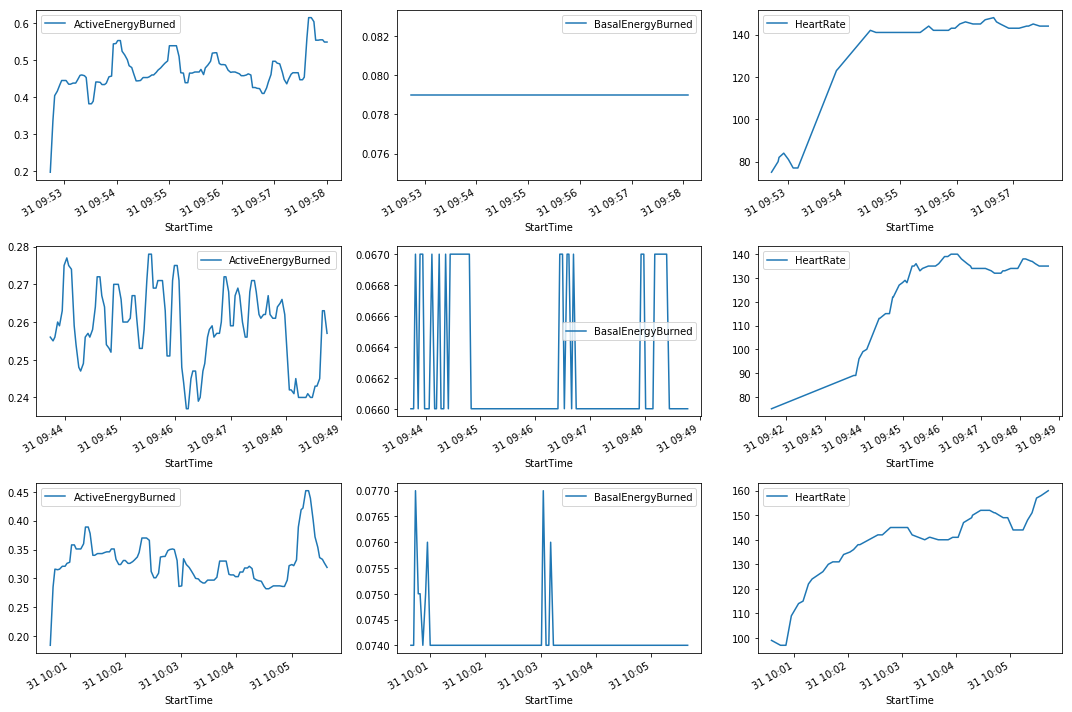

Workout Type:  Walking


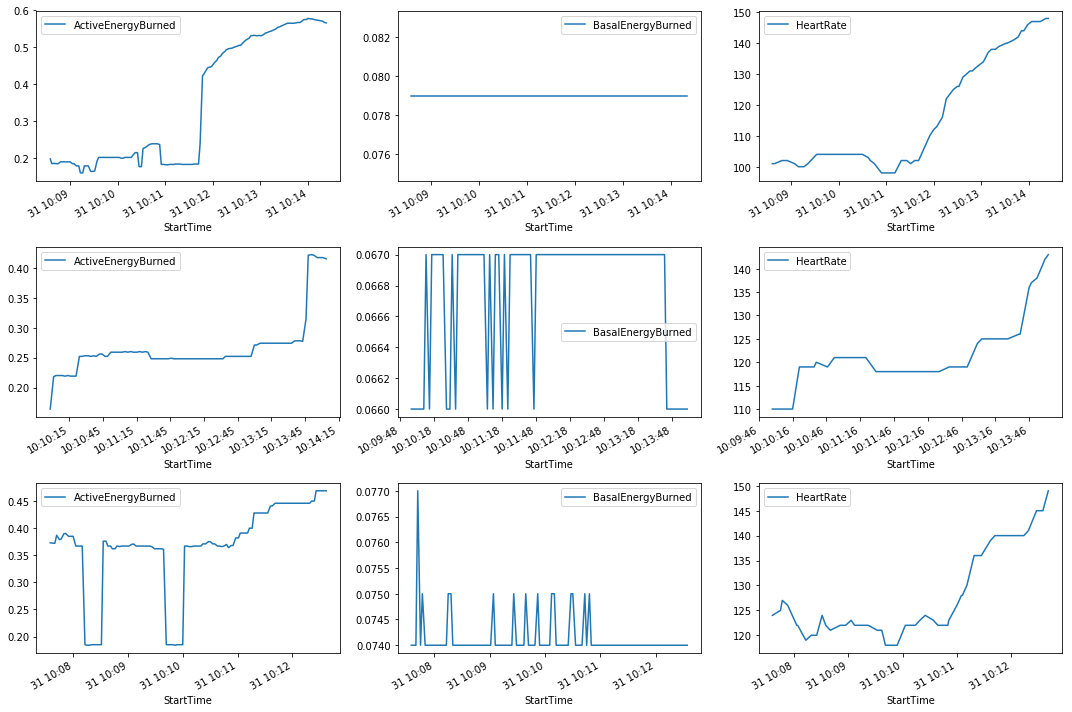

In [114]:
for wt in workoutType:
    print('Workout Type: ', wt)
    fig, axes = plt.subplots(3, 3, figsize = (15, 10))
    for i,p in enumerate(subpath):
        userPath = path + p + '/'
        for j in range(len(analyzeType)):
            WO = loadWorkout(userPath, wt, analyzeType[j])
            WO.plot(x = 'StartTime', y = analyzeType[j], ax = axes[i,j])
    plt.tight_layout()
    plt.show()

## Ratio

Workout Type:  TraditionalStrengthTraining


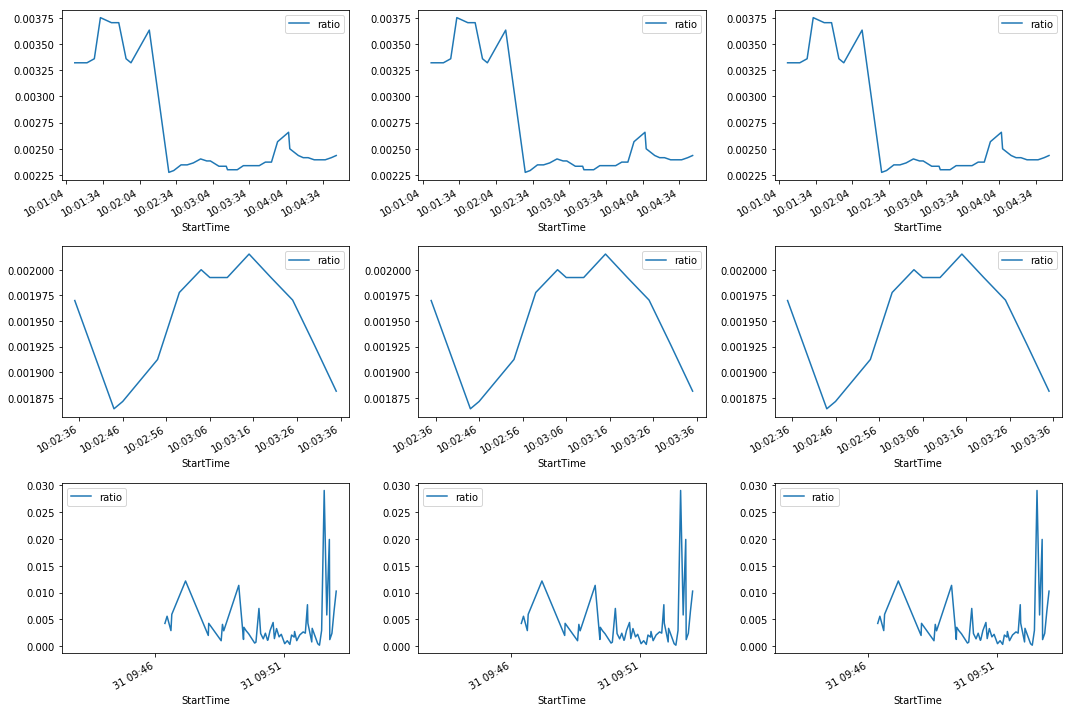

Workout Type:  Elliptical


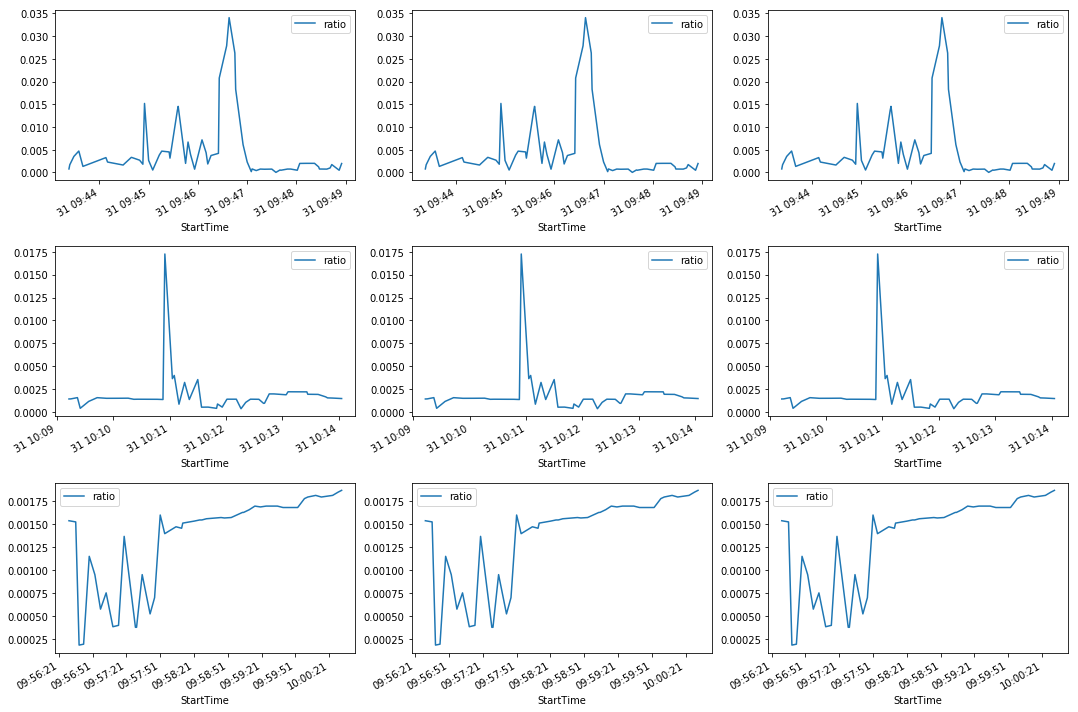

Workout Type:  Rowing


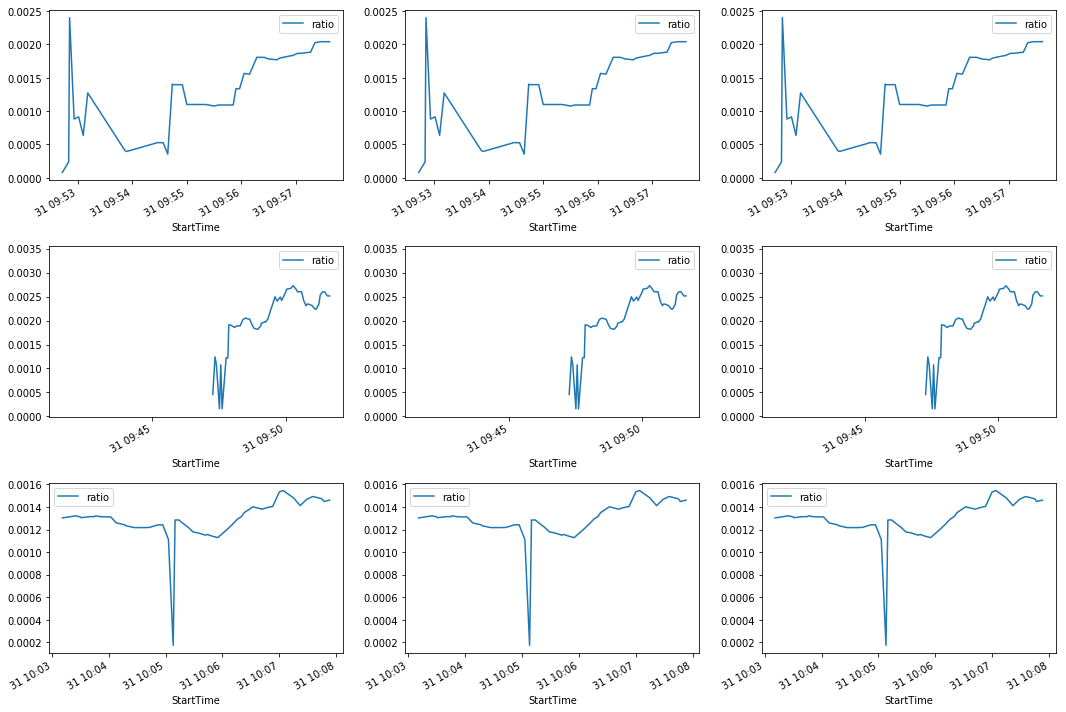

Workout Type:  Walking


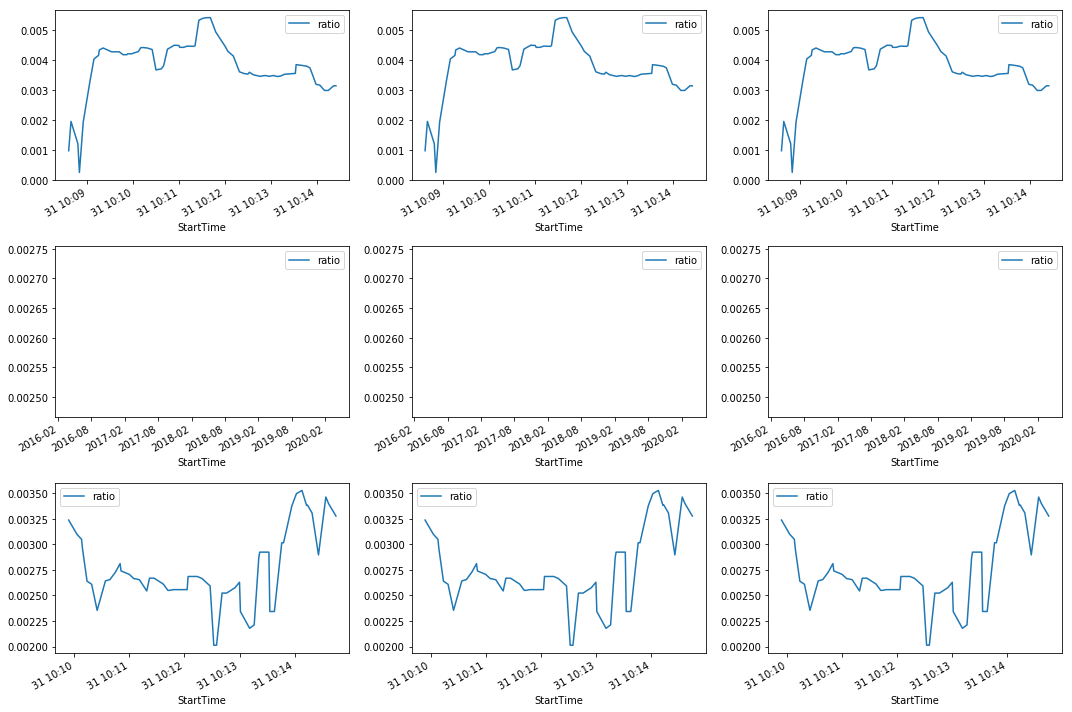

In [43]:
for wt in workoutType:
    print('Workout Type: ', wt)
    fig, axes = plt.subplots(3, 3, figsize = (15, 10))
    for i,p in enumerate(subpath):
        userPath = path + p + '/'
        for j in range(len(analyzeType)):
            WO = loadWorkoutRatio(userPath, wt)
            WO.plot(x = 'StartTime', y = 'ratio', ax = axes[i,j])
    plt.tight_layout()
    plt.show()